In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('cryptocurrencypricehistory-daily/bitcoin_price.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000"
1,"Feb 19, 2018",10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000"
2,"Feb 18, 2018",11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000"
3,"Feb 17, 2018",10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000"
4,"Feb 16, 2018",10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000"


In [4]:
df = df[::-1]

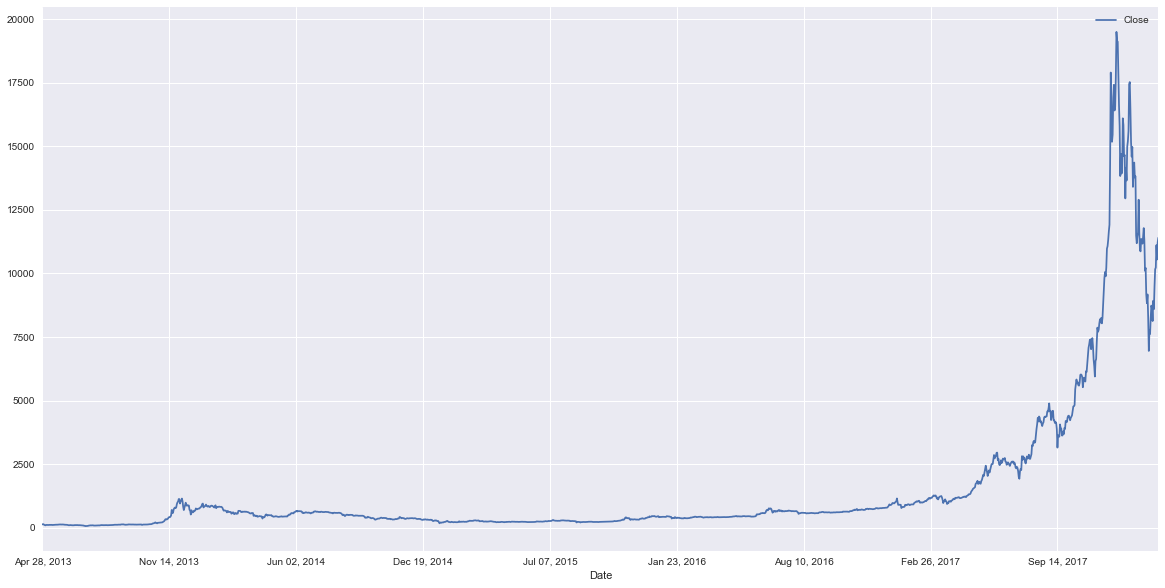

In [6]:
df.plot('Date', 'Close', figsize=(20,10))

## Prediction

In [24]:
price = df.Close.values.reshape(-1,1)

In [25]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
price = scaler.fit_transform(price)

In [10]:
# split into train and test sets
train_size = int(len(price) * 0.75)
test_size = len(price) - train_size
train, test = price[0:train_size], price[train_size:len(price)]
print(len(train), len(test))

1320 440


In [26]:
# convert an array of values into a dataset matrix
def create_dataset(price, look_back=1):
    X = []
    for i in range(look_back):
        X.append(price[i : i + len(price) - look_back])
    X.append(price[look_back: len(price)])
    return X

In [27]:
# reshape into X=t and Y=t+1
look_back = 1
train = create_dataset(train, look_back)
test = create_dataset(test, look_back)

In [32]:
trainX = train[0]
trainY = train[1]
testX = test[0]
testY = test[1]

In [33]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [35]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
 - 4s - loss: 6.8189e-05
Epoch 2/10
 - 4s - loss: 6.2071e-06
Epoch 3/10
 - 4s - loss: 2.1240e-06
Epoch 4/10
 - 4s - loss: 2.2349e-06
Epoch 5/10
 - 4s - loss: 2.4442e-06
Epoch 6/10
 - 4s - loss: 2.4983e-06
Epoch 7/10
 - 4s - loss: 2.5026e-06
Epoch 8/10
 - 4s - loss: 2.2652e-06
Epoch 9/10
 - 4s - loss: 2.2549e-06
Epoch 10/10
 - 4s - loss: 2.4120e-06


In [36]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [42]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.00 RMSE
Test Score: 0.02 RMSE


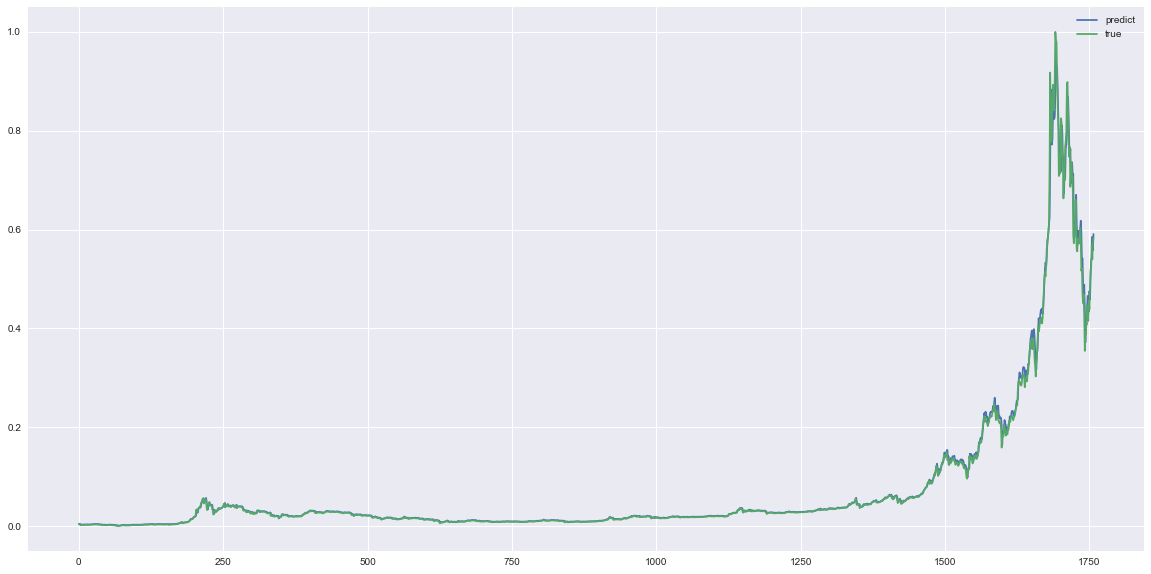

In [44]:
plt.figure(figsize=(20,10))
plt.plot(np.vstack((trainPredict, testPredict)), label = 'predict')
plt.plot(np.vstack((trainY, testY)), label = 'true')
plt.legend()